In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [ ]:
!kaggle datasets download imadeddinedjerarda/mrl-eye-dataset

Dataset URL: https://www.kaggle.com/datasets/imadeddinedjerarda/mrl-eye-dataset
License(s): unknown
100% 329M/330M [00:01<00:00, 227MB/s]
100% 330M/330M [00:01<00:00, 185MB/s]


In [ ]:
!unzip mrl-eye-dataset.zip

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
data_dir = "/content/mrleyedataset"
train_datagen = ImageDataGenerator(validation_split=0.2) # don't use rescale = 1./255

train_generator = train_datagen.flow_from_directory( data_dir,
                                                     target_size=(32,32),
                                                     batch_size=32,
                                                     shuffle=True,
                                                     class_mode='categorical',
                                                     subset='training')

validation_datagen = ImageDataGenerator(validation_split=0.2)

validation_generator =  validation_datagen.flow_from_directory( data_dir,
                                                                target_size=(32,32),
                                                                batch_size=32,
                                                                class_mode='categorical',
                                                                subset='validation')

Found 67919 images belonging to 2 classes.
Found 16979 images belonging to 2 classes.


In [ ]:
cnn_model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(32,32,3)),
    MaxPooling2D(pool_size=(1,1)),
    Conv2D(32,(3,3),activation='relu'),
    MaxPooling2D(pool_size=(1,1)),
#32 convolution filters used each of size 3x3
#again
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(1,1)),

#64 convolution filters used each of size 3x3
#choose the best features via pooling

#randomly turn neurons on and off to improve convergence
    Dropout(0.25),
#flatten since too many dimensions, we only want a classification output
    Flatten(),
#fully connected to get all relevant data
    Dense(128, activation='relu'),
#one more dropout for convergence' sake :)
#    Dropout(0.5),
#output a softmax to squash the matrix into output probabilities
    Dense(2, activation='softmax')
])

In [ ]:
cnn_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=[tf.keras.metrics.CategoricalAccuracy(),tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

In [ ]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 30, 30, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 28, 28, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 26, 26, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 64)        0

In [ ]:
history = cnn_model.fit(train_generator, validation_data=validation_generator, epochs=10)

Epoch 1/10
2123/2123 [==============================] - 84s 39ms/step - loss: 0.9273 - categorical_accuracy: 0.9246 - precision: 0.9246 - recall: 0.9246 - val_loss: 0.3682 - val_categorical_accuracy: 0.8667 - val_precision: 0.8667 - val_recall: 0.8667
Epoch 2/10
2123/2123 [==============================] - 78s 37ms/step - loss: 0.1107 - categorical_accuracy: 0.9617 - precision: 0.9617 - recall: 0.9617 - val_loss: 0.3011 - val_categorical_accuracy: 0.8783 - val_precision: 0.8783 - val_recall: 0.8783
Epoch 3/10
2123/2123 [==============================] - 78s 37ms/step - loss: 0.0772 - categorical_accuracy: 0.9736 - precision: 0.9736 - recall: 0.9736 - val_loss: 0.3116 - val_categorical_accuracy: 0.8782 - val_precision: 0.8782 - val_recall: 0.8782
Epoch 4/10
2123/2123 [==============================] - 77s 36ms/step - loss: 0.0629 - categorical_accuracy: 0.9785 - precision: 0.9785 - recall: 0.9785 - val_loss: 0.2478 - val_categorical_accuracy: 0.9021 - val_precision: 0.9021 - val_recall:

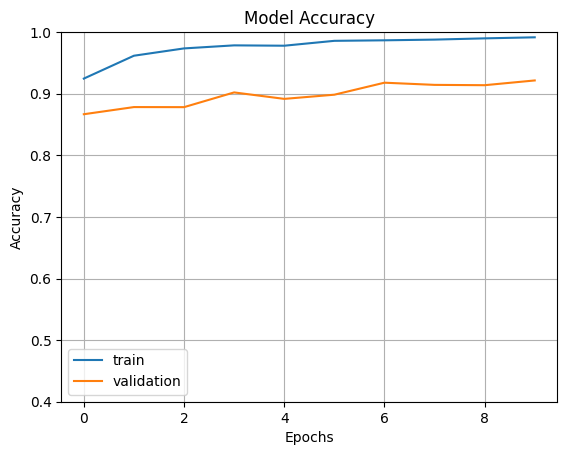

In [ ]:
fig1 = plt.gcf()
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [ ]:
import cv2
img_height, img_width = 32,32
image=cv2.imread("/content/mrleyedataset/Close-Eyes/s0001_00001_0_0_0_0_0_01.png")
image_resized= cv2.resize(image, (img_height,img_width))
image=np.expand_dims(image_resized,axis=0)

In [ ]:
import cv2
img_height, img_width = 32,32
image=cv2.imread("/content/mrleyedataset/Close-Eyes/s0001_00001_0_0_0_0_0_01.png")
print(image.shape)
r_eye = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
print(r_eye.shape)
r_eye = cv2.resize(r_eye, (img_height,img_width))
print(r_eye.shape)
#r_eye= r_eye/255
r_eye=  r_eye.reshape((-1, 32, 32, 3))
print(r_eye.shape)
#r_eye = np.expand_dims(r_eye,axis=0)
pred=cnn_model.predict(r_eye)

(86, 86, 3)
(86, 86, 3)
(32, 32, 3)
(1, 32, 32, 3)
1/1 [==============================] - 0s 108ms/step


In [ ]:
np.argmax(pred)

0

In [ ]:
import cv2
img_height, img_width = 32,32
image=cv2.imread("/content/mrleyedataset/Close-Eyes/s0001_00001_0_0_0_0_0_01.png")
image_resized= cv2.resize(image, (img_height,img_width))
image=np.expand_dims(image_resized,axis=0)

In [ ]:
pred=cnn_model.predict(image)

1/1 [==============================] - 0s 28ms/step


In [ ]:
output_class=np.argmax(pred)
print("The predicted class is", output_class)
# 0 is close 1 is open

The predicted class is 0


In [ ]:
cnn_model.save("./cnn.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from keras.models import load_model
test_model = load_model('./cnn.h5')
pred = np.argmax(test_model.predict(image), axis=-1)
print(pred)

1/1 [==============================] - 0s 81ms/step
[0]


In [ ]:
resnet50_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(32,32,3),
                   pooling='avg',classes=2,
                   weights= 'imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet50_model.add(pretrained_model)

94765736/94765736 [==============================] - 1s 0us/step


In [ ]:
resnet50_model.add(Flatten())
resnet50_model.add(Dense(128, activation='relu'))
resnet50_model.add(Dense(2, activation='softmax'))

In [ ]:
resnet50_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               262272    
                                                                 
 dense_3 (Dense)             (None, 2)                 258       
                                                                 
Total params: 23850242 (90.98 MB)
Trainable params: 262530 (1.00 MB)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


In [ ]:
resnet50_model.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=[tf.keras.metrics.CategoricalAccuracy(),tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])
history = resnet50_model.fit(train_generator, validation_data=validation_generator, epochs=10)

Epoch 1/10
2123/2123 [==============================] - 136s 63ms/step - loss: 0.1158 - categorical_accuracy: 0.9564 - precision_1: 0.9564 - recall_1: 0.9564 - val_loss: 0.3216 - val_categorical_accuracy: 0.8795 - val_precision_1: 0.8795 - val_recall_1: 0.8795
Epoch 2/10
2123/2123 [==============================] - 132s 62ms/step - loss: 0.0708 - categorical_accuracy: 0.9736 - precision_1: 0.9736 - recall_1: 0.9736 - val_loss: 0.4446 - val_categorical_accuracy: 0.8859 - val_precision_1: 0.8859 - val_recall_1: 0.8859
Epoch 3/10
2123/2123 [==============================] - 131s 62ms/step - loss: 0.0573 - categorical_accuracy: 0.9789 - precision_1: 0.9789 - recall_1: 0.9789 - val_loss: 0.4162 - val_categorical_accuracy: 0.8799 - val_precision_1: 0.8799 - val_recall_1: 0.8799
Epoch 4/10
2123/2123 [==============================] - 132s 62ms/step - loss: 0.0476 - categorical_accuracy: 0.9822 - precision_1: 0.9822 - recall_1: 0.9822 - val_loss: 0.4851 - val_categorical_accuracy: 0.8844 - val

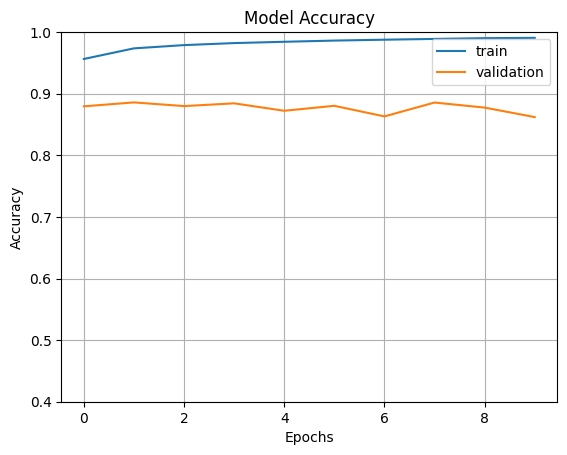

In [ ]:
fig1 = plt.gcf()
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [ ]:
resnet50_model.save("./resnet50.h5")

In [ ]:
resnet50_model_regularized = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(32,32,3),
                   pooling='avg',classes=2,
                   weights= 'imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet50_model_regularized.add(pretrained_model)

In [ ]:
resnet50_model_regularized.add(Flatten())
resnet50_model_regularized.add(Dense(128, activation='relu'))
resnet50_model_regularized.add(Dropout(0.5))
resnet50_model_regularized.add(Dense(2, activation='softmax'))

In [ ]:
resnet50_model_regularized.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=[tf.keras.metrics.CategoricalAccuracy(),tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])
history = resnet50_model_regularized.fit(train_generator, validation_data=validation_generator, epochs=10)

Epoch 1/10
2123/2123 [==============================] - 138s 64ms/step - loss: 0.2947 - categorical_accuracy: 0.9054 - precision_2: 0.9054 - recall_2: 0.9054 - val_loss: 0.3184 - val_categorical_accuracy: 0.8827 - val_precision_2: 0.8827 - val_recall_2: 0.8827
Epoch 2/10
2123/2123 [==============================] - 133s 63ms/step - loss: 0.2480 - categorical_accuracy: 0.9300 - precision_2: 0.9300 - recall_2: 0.9300 - val_loss: 0.3130 - val_categorical_accuracy: 0.9031 - val_precision_2: 0.9031 - val_recall_2: 0.9031
Epoch 3/10
2123/2123 [==============================] - 133s 63ms/step - loss: 0.2358 - categorical_accuracy: 0.9343 - precision_2: 0.9343 - recall_2: 0.9343 - val_loss: 0.3221 - val_categorical_accuracy: 0.9051 - val_precision_2: 0.9051 - val_recall_2: 0.9051
Epoch 4/10
2123/2123 [==============================] - 133s 63ms/step - loss: 0.2354 - categorical_accuracy: 0.9361 - precision_2: 0.9361 - recall_2: 0.9361 - val_loss: 0.4874 - val_categorical_accuracy: 0.8482 - val

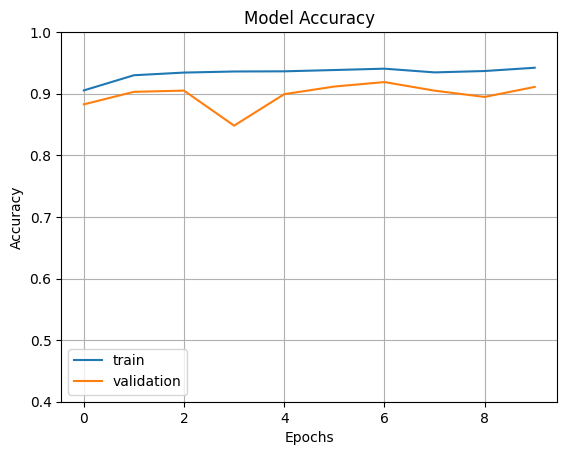

In [ ]:
fig1 = plt.gcf()
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [ ]:
resnet50_model_regularized.save("./resnet50_model_regularized.h5")

<a href="./resnet50_model_regularized.h5"> Download ResNet50 Regularized File </a>

In [ ]:
resnet50_fine_tune1 = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(32,32,3),
                   pooling='avg',classes=2,
                   weights= 'imagenet')
for layer in pretrained_model.layers:
        layer.trainable=True

resnet50_fine_tune1.add(pretrained_model)

In [ ]:
resnet50_fine_tune1.add(Flatten())
resnet50_fine_tune1.add(Dense(128, activation='relu'))
resnet50_fine_tune1.add(Dropout(0.5))
resnet50_fine_tune1.add(Dense(2, activation='softmax'))

In [ ]:
resnet50_fine_tune1.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=[tf.keras.metrics.CategoricalAccuracy(),tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])
history = resnet50_fine_tune1.fit(train_generator, validation_data=validation_generator, epochs=10)

Epoch 1/10
2123/2123 [==============================] - 437s 198ms/step - loss: 0.1793 - categorical_accuracy: 0.9449 - precision_3: 0.9449 - recall_3: 0.9449 - val_loss: 0.5898 - val_categorical_accuracy: 0.8143 - val_precision_3: 0.8143 - val_recall_3: 0.8143
Epoch 2/10
2123/2123 [==============================] - 420s 198ms/step - loss: 0.0825 - categorical_accuracy: 0.9729 - precision_3: 0.9729 - recall_3: 0.9729 - val_loss: 0.2411 - val_categorical_accuracy: 0.9078 - val_precision_3: 0.9078 - val_recall_3: 0.9078
Epoch 3/10
2123/2123 [==============================] - 420s 198ms/step - loss: 0.0924 - categorical_accuracy: 0.9701 - precision_3: 0.9701 - recall_3: 0.9701 - val_loss: 0.4261 - val_categorical_accuracy: 0.8616 - val_precision_3: 0.8616 - val_recall_3: 0.8616
Epoch 4/10
2123/2123 [==============================] - 420s 198ms/step - loss: 0.0973 - categorical_accuracy: 0.9663 - precision_3: 0.9663 - recall_3: 0.9663 - val_loss: 0.2116 - val_categorical_accuracy: 0.9135 -

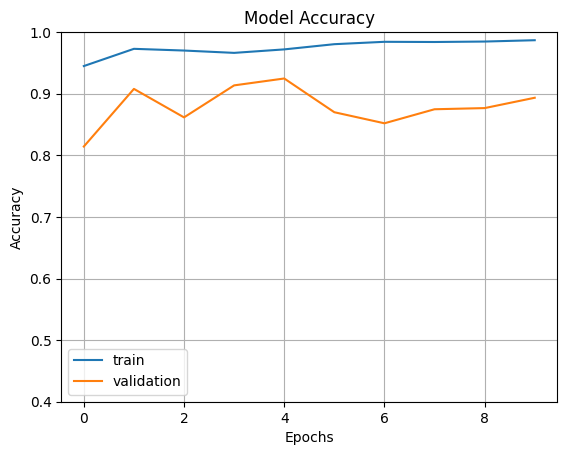

In [ ]:
fig1 = plt.gcf()
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [ ]:
resnet50_fine_tune1.save("./resnet50_fine_tune.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


<a href="./resnet50.h5"> Download ResNet50 File </a>

<a href="./resnet50_fine_tune.h5"> Download fine_tune ResNet50 File </a>